In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
wine = datasets.load_wine()
X = wine.data[:,[9,12]]
y = wine.target

sc = StandardScaler()
X_std = sc.fit_transform(X)


In [3]:
model = GaussianMixture(n_components=3,covariance_type='diag',random_state=1)

model.fit(X_std)

model2 = GaussianMixture(n_components=3,covariance_type='full',random_state=1)

model2.fit(X_std)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=1, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

<function matplotlib.pyplot.show(*args, **kw)>

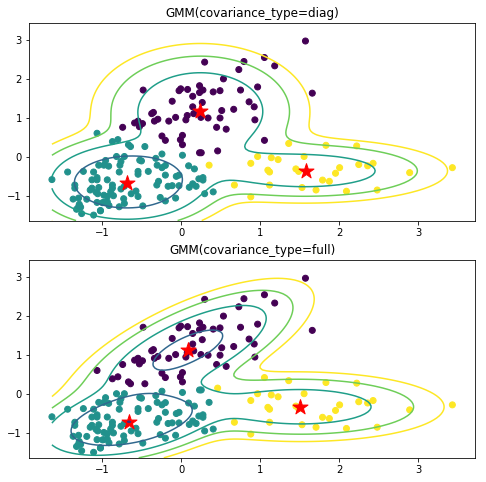

In [19]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)

x = np.linspace(X_std[:,0].min(),X_std[:,0].max(),100)
y = np.linspace(X_std[:,0].min(),X_std[:,0].max(),100)

X,Y = np.meshgrid(x,y)
XX = np.array([X.ravel(),Y.ravel()]).T
Z = -model.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X,Y,Z,levels = [0.5,1,2,3,4,5])
plt.scatter(X_std[:,0],X_std[:,1],c=model.predict(X_std))
plt.scatter(model.means_[:,0],model.means_[:,1],s=250,marker='*',c='red')
plt.title('GMM(covariance_type=diag)')


plt.subplot(2,1,2)

x = np.linspace(X_std[:,0].min(),X_std[:,0].max(),100)
y = np.linspace(X_std[:,0].min(),X_std[:,0].max(),100)

X,Y = np.meshgrid(x,y)
XX = np.array([X.ravel(),Y.ravel()]).T
Z = -model2.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X,Y,Z,levels = [0.5,1,2,3,4,5])
plt.scatter(X_std[:,0],X_std[:,1],c=model2.predict(X_std))
plt.scatter(model2.means_[:,0],model2.means_[:,1],s=250,marker='*',c='red')
plt.title('GMM(covariance_type=full)')

plt.show

In [5]:
model.predict(X_std)


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
model.weights_

array([0.33382347, 0.50039829, 0.16577824])

In [8]:
model.means_

array([[ 0.24529784,  1.16494852],
       [-0.68692906, -0.65838607],
       [ 1.5795315 , -0.35850242]])

In [9]:
model.covariances_

array([[0.3247152 , 0.51324971],
       [0.24025176, 0.23149423],
       [0.61267547, 0.13016258]])

In [10]:
model2.covariances_

array([[[ 0.3930839 ,  0.3184785 ],
        [ 0.3184785 ,  0.51537395]],

       [[ 0.2722111 ,  0.0899247 ],
        [ 0.0899247 ,  0.1860756 ]],

       [[ 0.62958843, -0.00149391],
        [-0.00149391,  0.15105973]]])

In [72]:

model3 = BayesianGaussianMixture(n_components=10,covariance_type='full',random_state=6,weight_concentration_prior=0.0001)
model3.fit(X_std)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=6, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=0.0001,
                        weight_concentration_prior_type='dirichlet_process')

<function matplotlib.pyplot.show(*args, **kw)>

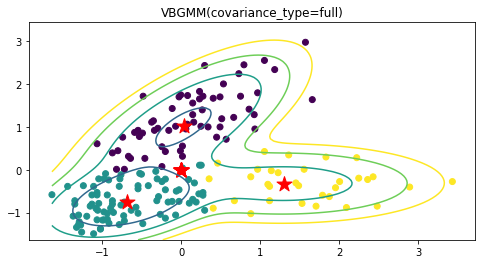

In [73]:
plt.figure(figsize=(8,4))

x = np.linspace(X_std[:,0].min(),X_std[:,0].max(),100)
y = np.linspace(X_std[:,0].min(),X_std[:,0].max(),100)

X,Y = np.meshgrid(x,y)
XX = np.array([X.ravel(),Y.ravel()]).T
Z = -model3.score_samples(XX)
Z = Z.reshape(X.shape)
plt.contour(X,Y,Z,levels = [0.5,1,2,3,4,5])
plt.scatter(X_std[:,0],X_std[:,1],c=model3.predict(X_std))
plt.scatter(model3.means_[:,0],model3.means_[:,1],s=250,marker='*',c='red')
plt.title('VBGMM(covariance_type=full)')

plt.show

In [74]:
model3.weights_

array([6.00647613e-03, 3.74786576e-01, 4.18025939e-01, 2.01180474e-01,
       5.35875760e-07, 5.35822177e-11, 5.35768601e-15, 5.35715029e-19,
       5.35661463e-23, 5.35607902e-27])

<function matplotlib.pyplot.show(*args, **kw)>

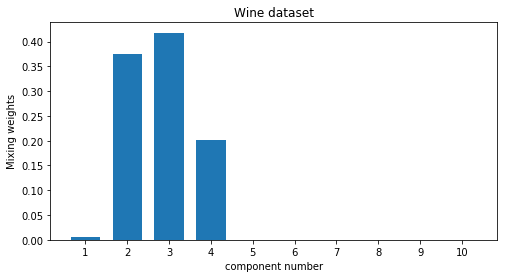

In [75]:
x = np.arange(1,model3.n_components+1)

plt.figure(figsize=(8,4))
plt.bar(x,model3.weights_,width=0.7,tick_label=x)

plt.ylabel('Mixing weights')
plt.xlabel('component number')
plt.title('Wine dataset')
plt.show